In [4]:
from utils import CleanData
from models.DecisionTree import DecisionTree
from models.neural_network import NeuralNetwork
from plotData import plotData
import warnings
from sklearn.metrics import accuracy_score
import numpy as np

warnings.filterwarnings('ignore')

               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

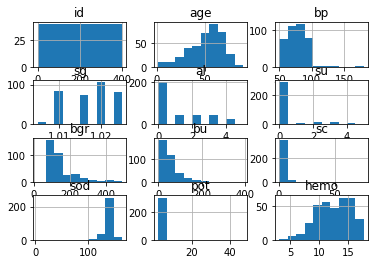

In [34]:
intial_dataframe = CleanData("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
intial_dataframe = CleanData(".\kidney_disease.csv")
intial_dataframe.describeData()

In [35]:
column_names = ["variance", "skewness", "curtosis", "entropy", "classification"]
X_train, X_test, y_train, y_test = intial_dataframe.splitData(1 / 3, 42, column_names)


In [54]:
X_train.isnull().values.any()



1

In [38]:
Tree_class = DecisionTree (len(column_names))
tab_log_loss_tree, tab_log_loss_tree_box, optimal_depth = Tree_class.cross_validation(X_train, y_train)

In [39]:
print("Optimal depth = ", optimal_depth)

Optimal depth =  1


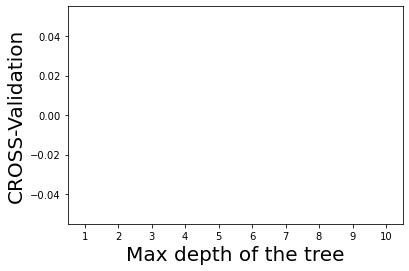

In [40]:
Tree_class.plot(X_train, y_train)

In [14]:
y_tree, y_forest, y_ada = Tree_class.adjust_classification(X_train, X_test, y_train, optimal_depth)


,0,1,2,entropy
430,-0.035196,-0.115131,-0.056876,0.797298
588,-0.262581,-0.017878,-0.078625,0.658674
296,-0.247509,0.017196,0.021041,0.578248
184,-0.293198,0.296408,0.071601,0.384126
244,0.127831,-0.327341,0.084124,0.838568
...,...,...,...,...
139,0.148598,-0.213869,-0.008266,0.889477
1200,0.094948,-0.036029,-0.177220,0.827986
1227,0.132323,0.022259,-0.142161,0.766375
224,0.083388,-0.142037,-0.030164,0.848797


KeyError: '0'

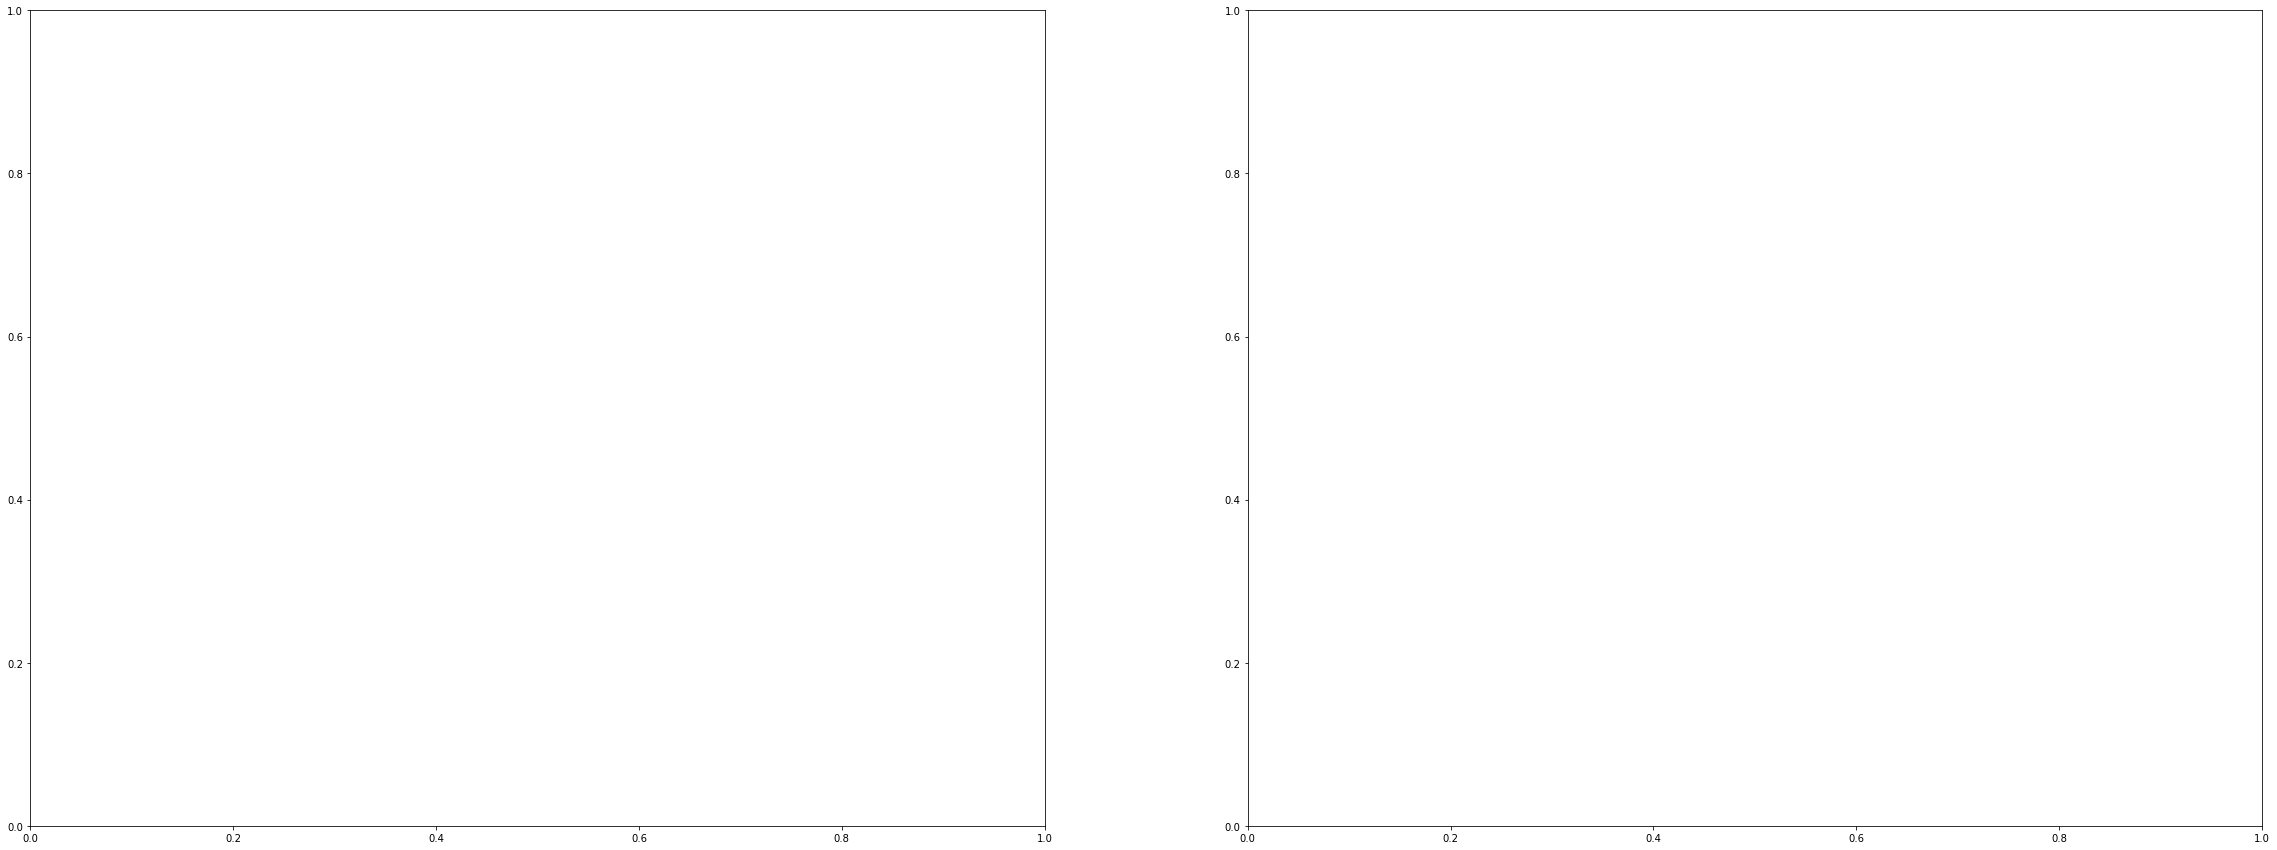

In [24]:
plotData(X_test, y_test, y_tree, X_train.columns[0],  X_train.columns[1], "DecisionTree")

In [ ]:
plotData(X_test, y_test, y_forest, "variance", "entropy", "RandomForest")

In [ ]:
plotData(X_test, y_test, y_ada, "variance", "entropy", "AdaBoost")

In [ ]:
banknoteData.calculate_metrics(y_tree)

In [ ]:
banknoteData.calculate_metrics(y_forest)

In [ ]:
banknoteData.calculate_metrics(y_ada)

In [ ]:
neuralModels = []
neuralMetric = []

layers_sizes= [(5,2),(4,2),(6,2),(3,2),(4,4,2)]
activations=["logistic", "tanh"]
learning_rate=np.linspace(0.001,0.1,10)


for layerSize in layers_sizes:
    for activation in activations:
        for lr in learning_rate:
            modelNeural = NeuralNetwork(solver="lbfgs", layers_sizes=layerSize, activation=activation, learning_rate=lr)
            neuralModels.append((layerSize, activation, lr))
            y_pred=modelNeural.fitAndScore(X_train, X_test, y_train, y_test)
            neuralMetric.append(accuracy_score(y_test,y_pred))
max_value = max(neuralMetric)
max_index = neuralMetric.index(max_value)

print("The neural network with the best accuracy has the parameters: layer size", {neuralModels[max_index][0]}, "activation function",{neuralModels[max_index][1]}, "learning rate",{neuralModels[max_index][2]}, "with an accuracy score of :", max_value)

            
